# Práctca: Decision Trees - Regression (Clase)

## Santander MetGroup

1. [Ajustando Árboles de Regresión](#1-Ajustando-%C3%81rboles-de-Regresi%C3%B3n:)

 1.1 [Boston data set](#1.1-Boston-data-set:)

 1.2 [Práctica: the Hitters data set](#1.2-Pr%C3%A1ctica:-the-Hitters-data-set:)

## Alumno: Gerardo de Miguel González

## 1. Ajustando Árboles de Regresión:

### 1.1 Boston data set:

En primer lugar, consideraremos el datasetBoston para entrenar un árbol regresión a partir de una submuestra de entrenamiento.

#### Clase

In [1]:
#::GMG::Bibliotecas que nevesitamos para la práctica
library(MASS)
library(tree)

In [2]:
#::GMG::Split replicable original de la práctica ... 
set.seed(1)
indTrain <- sample(1:nrow(Boston), nrow(Boston)/2)

In [3]:
tree.boston <- tree(medv~., Boston, subset = indTrain)
summary(tree.boston)


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = indTrain)
Variables actually used in tree construction:
[1] "lstat" "rm"    "dis"  
Number of terminal nodes:  8 
Residual mean deviance:  12.65 = 3099 / 245 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-14.10000  -2.04200  -0.05357   0.00000   1.96000  12.60000 

Notar que la salida de summary() indica que sólo tres de las variables han sido utilizadas para construir el árbol. En el caso de los árboles de regresión la desviación se refiere a la suma de los errores al cuadrado.

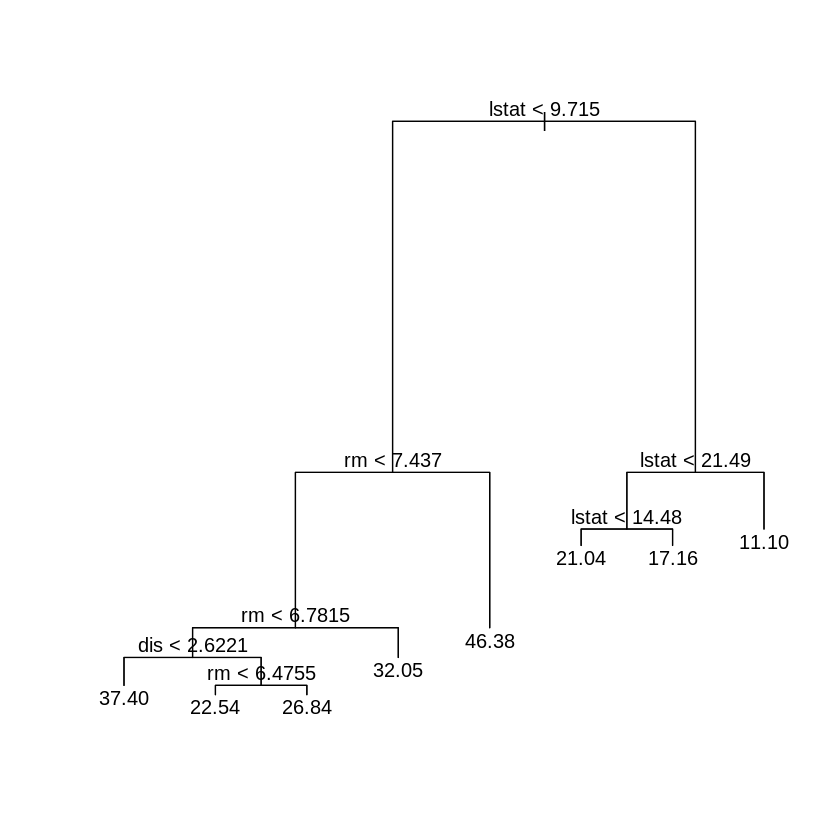

In [6]:
plot(tree.boston)
text(tree.boston, pretty = 0)

La variable `lstat` mide el porcentaje de individuos con bajo nivel socio-económico. El árbol indica que valores bajos de esta variable se corresponden con casas más caras. El árbol predice un precio medio por casa de $46,400 para casas grandes en suburbios cuyos residentes tiene un alto nivel socio-económico (rm  7.437 y lstat < 9.715).

La función `cv.tree()` realiza un entrenamiento con validación cruzada considerando un valor dado (`K=10` por defecto) de penalización de la complejidad para evaluar cuando es necesaria la poda del árbol.

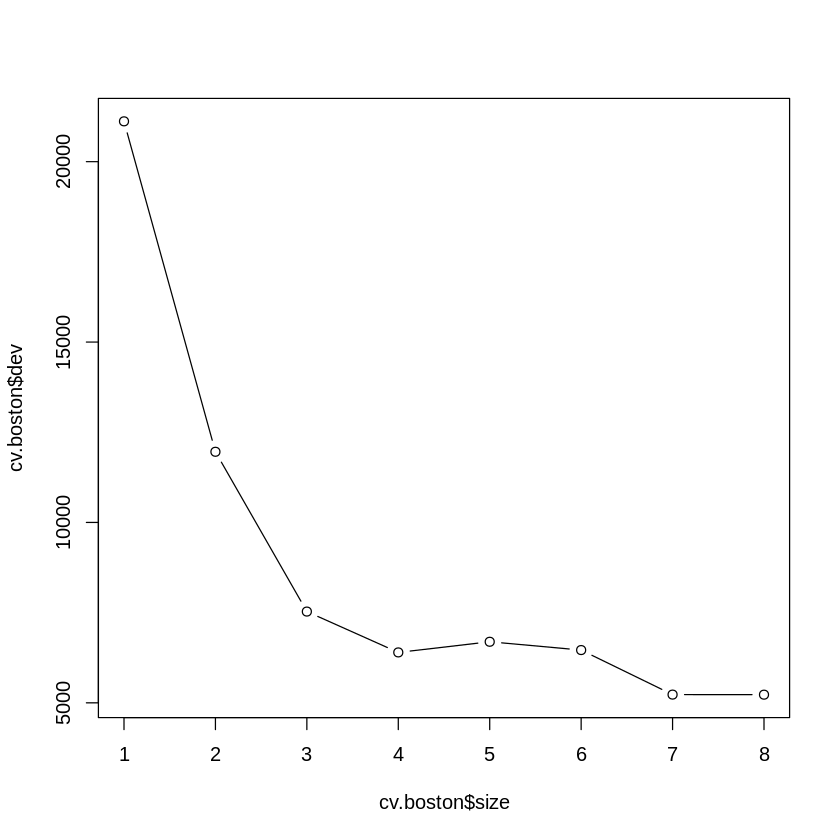

In [4]:
cv.boston <- cv.tree(tree.boston)
plot(cv.boston$size, cv.boston$dev, type = "b")

In [7]:
#::GMG::Intento ver alguna descripción del resultado
str(cv.boston)

List of 4
 $ size  : int [1:8] 8 7 6 5 4 3 2 1
 $ dev   : num [1:8] 5226 5228 6463 6693 6397 ...
 $ k     : num [1:8] -Inf 256 452 769 819 ...
 $ method: chr "deviance"
 - attr(*, "class")= chr [1:2] "prune" "tree.sequence"


En este caso, el árbol más complejo es seleccionado por la validación cruzada. Sin embargo, también podemos usar directamente la función `prune.tree()`:

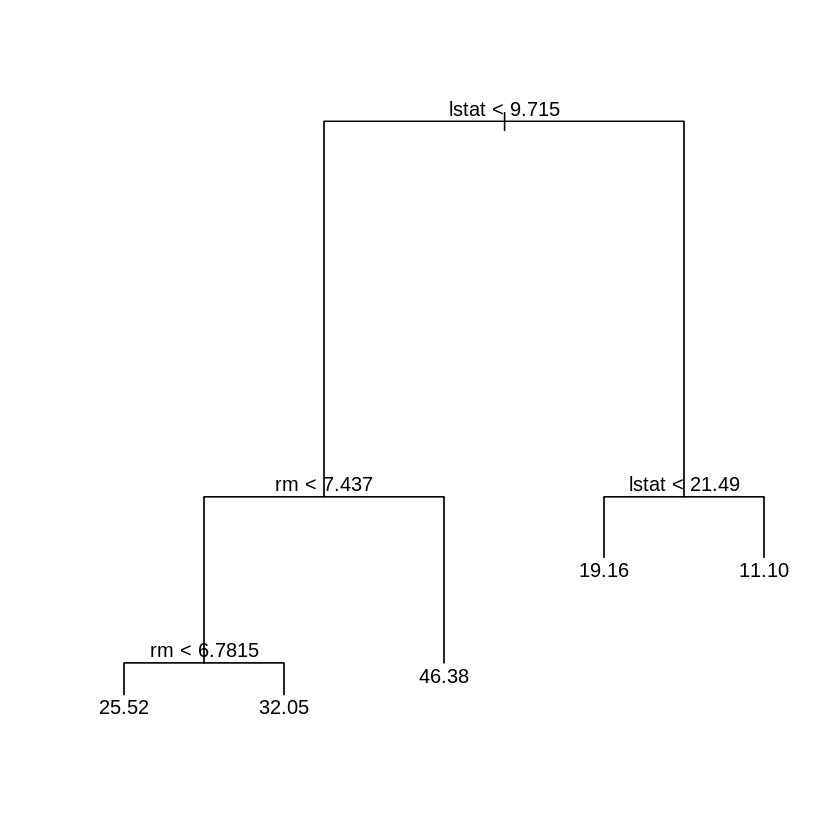

In [8]:
prune.boston <- prune.tree(tree.boston, best = 5)
plot(prune.boston)
text(prune.boston, pretty = 0)

Consideremos el árbol sin podar para hacer predicciones sobre el conjunto de test y evaluemos el error:

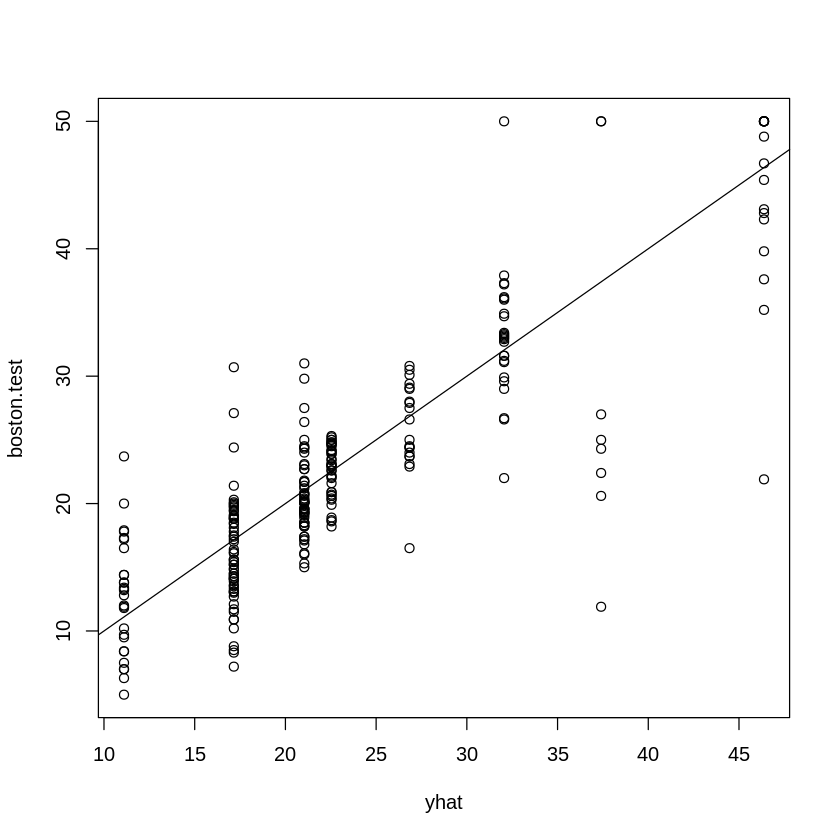

In [9]:
yhat <- predict(tree.boston, newdata = Boston[-indTrain,])
boston.test <- Boston[-indTrain, "medv"]
plot(yhat, boston.test)
abline(0,1)

In [10]:
#::GMG::Aquí se calcula el MSE
sqrt(mean((yhat-boston.test)^2))

[1] 5.004557

In [16]:
#::GMG::Para aclararme ...
summary(boston.test)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   17.10   21.70   22.67   25.00   50.00 

In [17]:
summary(yhat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.10   17.16   21.04   22.67   26.84   46.38 

Mientras que en el conjunto de train tenemos:

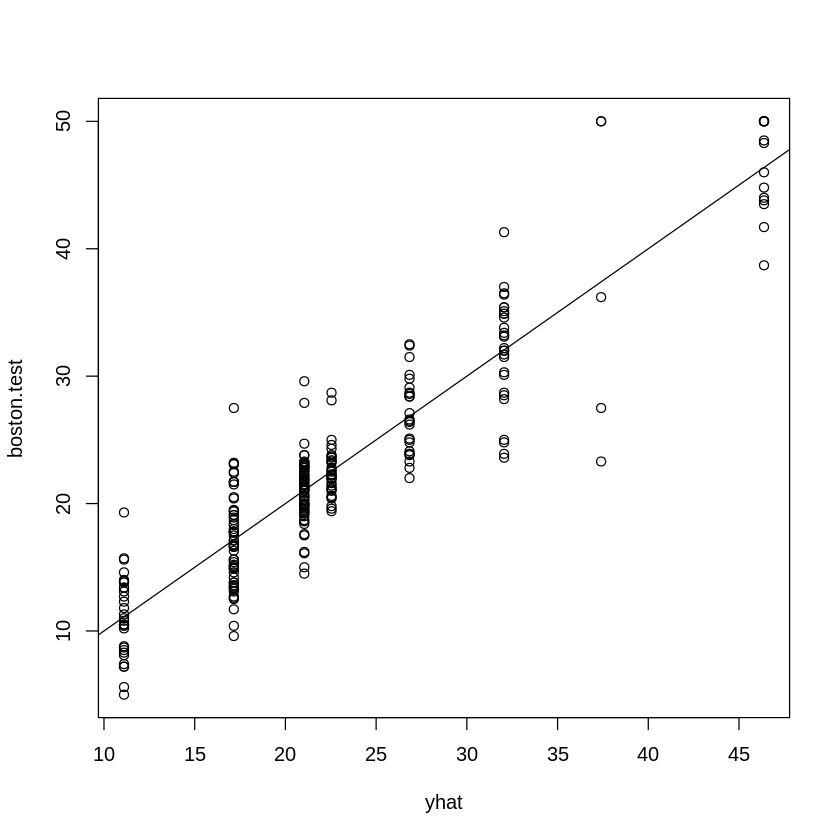

In [11]:
yhat <- predict(tree.boston, newdata = Boston[indTrain,])
boston.test <- Boston[indTrain, "medv"]
plot(yhat, boston.test)
abline(0,1)

In [13]:
#::GMG::Aquí se calcula el MSE
sqrt(mean((yhat-boston.test)^2))

[1] 3.499638

In [18]:
summary(yhat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.10   17.16   21.04   22.67   26.84   46.38 

In [19]:
summary(boston.test)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   17.10   21.70   22.67   25.00   50.00 

Es decir, mientras que en el conjunto de test tenemos un error de 5.005 aproximadamante para el conjunto de train tenemos un error de 3.5. 

**::Ejercicio::**: Revisad la función `tree.control` y forzar el árbol para que sea el más profundo posible, ¿cómo cambian los errores de test y de train?

#### Trabajo personal

In [ ]:
#::GMG::Una manera canónica 75/25%
#https://stackoverflow.com/questions/17200114/how-to-split-data-into-training-testing-sets-using-sample-function
## 75% of the sample size
smp_size <- floor(0.75 * nrow(Boston))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(Boston)), size = smp_size)

boston_train <- Boston[train_ind, ]
boston_test <- Boston[-train_ind, ]

In [ ]:
#::GMG::Quizá convenientte echar un vistazo al dataset....
# https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/Boston.html
str(Boston)

In [ ]:
summary(Boston)

In [ ]:
#::GMG::Obtención del árbol de regresión original de la práctica ...
tree_boston <- tree(formula = medv ~ ., data = boston_train)
summary(tree_boston)

In [ ]:
plot(tree_boston)
text(tree_boston, pretty = 0)
title(main = 'Árbol de Regresión')

### 1.2 Práctica: the Hitters data set:

La librería ISLR contiene el dataset Hitters el cual contiene diferentes datos de jugadores de baseball y cuyo objetivo es la predicción del salario de los jugadores en función de diferentes variables explicativas.

En la presente práctica considera en primer lugar el modelo obtenido considerando únicamente como variables explicativas el número de años que el jugador ha participado en las ligas mayores (Years) y el número de bateos de la temporada anterior (Hits).

A continuación extiende el experimento para considerar todas las variables y obtener un árbol final a partir de la poda del árbol inicial. Compara los resultados obtenidos con ambos modelos.

Notar que la base de datos en este caso puede tener valores perdidos (NA).

In [ ]:
library(ISLR)

In [ ]:
attach(Hitters)
# remove NA values
Hitters <- na.omit(Hitters)
Salary <- na.omit(Salary)
# put salary on log scale and fit reg. tree

Del mismo modo, en este caso es preferible trabajar con el logaritmo del salario (log(Salary)) ya que el comportamiento de esta variable transformada es más Gaussiano.

In [ ]:
set.seed(1)
indTrain <- sample(1:nrow(Hitters), nrow(Hitters)/2)
tree.hitters <- tree(log(Salary)~ Years + Hits, Hitters, subset = indTrain)
summary(tree.hitters)

In [ ]:
plot(tree.hitters)
text(tree.hitters,pretty = 0)

In [ ]:
cv.hitters <- cv.tree(tree.hitters)
plot(cv.hitters$size, cv.hitters$dev, type = "b")

In [ ]:
prune.hitters <- prune.tree(tree.hitters, best = 4)
plot(prune.hitters)
text(prune.hitters, pretty = 0)

In [ ]:
detach(Hitters)